In [3]:
from fastai import *
%matplotlib inline
from fastai.basics import *

In [2]:
%reload_ext autoreload
%autoreload 2

In [8]:
path = "C://Users//91958//sgd_scratch_fastai//"
mnist = pickle.load(open(path+ 'mnist.pkl', 'rb'),  encoding='latin-1')

In [13]:
 ((x_train, y_train), (x_valid, y_valid), _) = mnist

In [15]:
x_train.shape

(50000, 784)

(50000, 784)

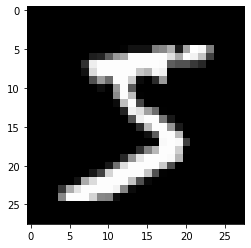

In [16]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

In [18]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train.shape, y_train.min(), y_train.max()

(torch.Size([50000, 784]), tensor(0), tensor(9))

In [19]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [36]:


x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [46]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

In [47]:
model = Mnist_Logistic().cuda()

In [55]:
def update(x,y,lr):
#         optimizer =optim.Adam(model.parameters(), lr)
        wd = 1e-5
        y_hat = model(x)
        # weight decay
        w2 = 0.
        for p in model.parameters():
            w2 += (p**2).sum()
        loss = loss_func(y_hat, y) + w2*wd
        loss.backward()

        with torch.no_grad():
            for p in model.parameters():
                p.sub_(lr * p.grad)
                p.grad.zero_()
        return loss.item()

In [72]:
loss_func = nn.CrossEntropyLoss()

lr = 1e-6


In [60]:
losses = [update(x,y,lr) for x,y in data.train_dl]

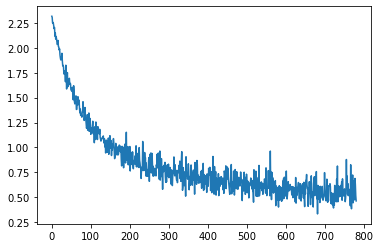

In [61]:
plt.plot(losses);

In [62]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [65]:
def update1(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = mnist_model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [66]:
mnist_model = Mnist_NN().cuda()

In [73]:
losses1 = [update1(x,y,lr) for x,y in data.train_dl]

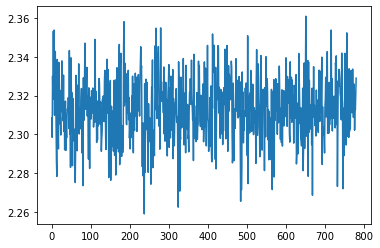

In [74]:
plt.plot(losses1)

In [75]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func, metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


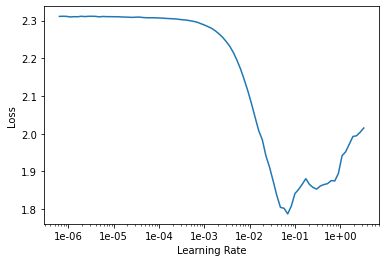

In [76]:
learn.lr_find()
learn.recorder.plot()

In [77]:
learn.fit_one_cycle(2, 1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.173490,0.163315,0.951600,00:11
1,0.092844,0.095119,0.971400,00:12


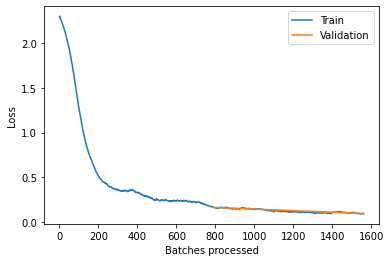

In [79]:
learn.recorder.plot_losses()

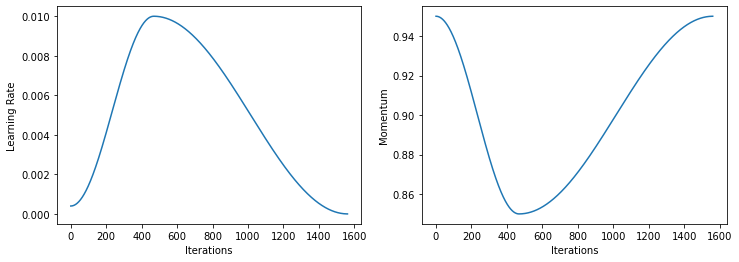

In [81]:
learn.recorder.plot_lr(show_moms = True)